In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def var_check(file_path):
    print(f"Listing variable names: {file_path}\n")
    with h5py.File(file_path, "r") as h5_file:
        for key in h5_file.keys():
            print(f"Variable name: {key}")

train_file_path = "/Users/aiden/PycharmProjects/pythonProject_AMS 595/train_catvnoncat.h5"
test_file_path = "/Users/aiden/PycharmProjects/pythonProject_AMS 595/test_catvnoncat.h5"

var_check(train_file_path)
print("\n" + "="*50 + "\n")
var_check(test_file_path)


Listing variable names: /Users/aiden/PycharmProjects/pythonProject_AMS 595/train_catvnoncat.h5

Variable name: list_classes
Variable name: train_set_x
Variable name: train_set_y


Listing variable names: /Users/aiden/PycharmProjects/pythonProject_AMS 595/test_catvnoncat.h5

Variable name: list_classes
Variable name: test_set_x
Variable name: test_set_y


In [3]:
def structure(file_path):
    print(f"Exploring HDF5 file: {file_path}\n")
    with h5py.File(file_path, "r") as files:
        def overview(group, level=0):
            for key in group.keys():
                item = group[key]
                print("  " * level + f"{key}: {type(item)}")
                if isinstance(item, h5py.Group):
                    overview(item, level + 1)  
                elif isinstance(item, h5py.Dataset):
                    print("  " * level + f" shape: {item.shape}, dtype: {item.dtype}")
        overview(files)

structure(train_file_path)
print("\n" + "="*50 + "\n")
structure(test_file_path)


Exploring HDF5 file: /Users/aiden/PycharmProjects/pythonProject_AMS 595/train_catvnoncat.h5

list_classes: <class 'h5py._hl.dataset.Dataset'>
 shape: (2,), dtype: |S7
train_set_x: <class 'h5py._hl.dataset.Dataset'>
 shape: (209, 64, 64, 3), dtype: uint8
train_set_y: <class 'h5py._hl.dataset.Dataset'>
 shape: (209,), dtype: int64


Exploring HDF5 file: /Users/aiden/PycharmProjects/pythonProject_AMS 595/test_catvnoncat.h5

list_classes: <class 'h5py._hl.dataset.Dataset'>
 shape: (2,), dtype: |S7
test_set_x: <class 'h5py._hl.dataset.Dataset'>
 shape: (50, 64, 64, 3), dtype: uint8
test_set_y: <class 'h5py._hl.dataset.Dataset'>
 shape: (50,), dtype: int64


# Logistic Regression on Cat vs Non-Cat Dataset

## Problem Intent and Objectives

This task involves implementing a logistic regression model to classify images as "cat" or "non-cat". Logistic regression is a supervised learning algorithm often used for binary classification tasks. The goal of this problem is to:
1. **Understand and implement logistic regression from scratch**, without using prebuilt libraries for training.
2. **Preprocess image data** for machine learning, including flattening and normalization.
3. **Train a binary classifier** using gradient descent to optimize weights and biases.
4. **Visualize misclassifications** to understand the model's limitations and errors.

The project highlights the importance of:
- **Feature extraction**: Flattening images into a single vector of pixel intensities.
- **Gradient descent optimization**: Minimizing the binary cross-entropy loss function.
- **Performance evaluation**: Measuring accuracy on both training and test datasets.
- **Error analysis**: Identifying and visualizing misclassified examples.

---

## Key Mathematical Foundations

### 1. Binary Cross-Entropy Loss
The loss function used for logistic regression is the binary cross-entropy, defined as:

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(a^{(i)}) + (1 - y^{(i)}) \log(1 - a^{(i)}) \right]
$$

where:
- $m$: Number of examples.
- $y^{(i)}$: True label for the $i$-th example ($1$ for "cat" and $0$ for "non-cat").
- $a^{(i)} = \sigma(z^{(i)})$: Predicted probability, where $\sigma$ is the sigmoid function.

The objective is to minimize $J(w, b)$ with respect to weights $w$ and bias $b$.

### 2. Gradient Descent
The gradients of the loss function with respect to $w$ and $b$ are computed as:

$$
\frac{\partial J}{\partial w} = \frac{1}{m} X \cdot (A - Y)^T, \quad
\frac{\partial J}{\partial b} = \frac{1}{m} \sum (A - Y)
$$

where:
- $X$: Flattened input features (shape: $n \times m$).
- $A = \sigma(Z)$: Predicted probabilities ($Z = w^T X + b$).

Weights and bias are updated as:
$$
w := w - \alpha \frac{\partial J}{\partial w}, \quad
b := b - \alpha \frac{\partial J}{\partial b}
$$

where $\alpha$ is the learning rate.

---

## Implementation Steps

1. **Load and Explore the Dataset**:
   - Load the HDF5 files containing images and labels.
   - Explore the dataset structure and verify its contents.

2. **Data Preprocessing**:
   - Flatten the image data into feature vectors.
   - Normalize the pixel values to the range $[0, 1]$.

3. **Model Training**:
   - Implement the forward and backward propagation steps of logistic regression.
   - Use gradient descent to update weights and bias.

4. **Model Evaluation**:
   - Compute training and test accuracies.
   - Visualize the cost function over iterations to ensure convergence.

5. **Error Analysis**:
   - Identify misclassified examples and visualize them to understand where the model fails.

---

## Insights and Key Takeaways

1. **Gradient Descent Behavior**:
   - Observing the cost reduction over iterations helps confirm the optimization's progress.

2. **Performance on Test Set**:
   - The model achieves a test accuracy of approximately $70\%$, highlighting the model's limitations in generalizing to unseen data.

3. **Error Visualization**:
   - Misclassified images allow us to understand edge cases, such as poor lighting or features not captured well by pixel intensity.

4. **Limitations**:
   - Logistic regression is a linear model and may struggle with more complex datasets. A neural network or other non-linear models could improve performance.

This problem provides a foundation for understanding and implementing logistic regression, preparing the way for more advanced models and techniques in supervised learning.


Training set shape: (209, 64, 64, 3), (209,)
Test set shape: (50, 64, 64, 3), (50,)
Classes: [b'non-cat' b'cat']
Processed Training set shape: (12288, 209), (1, 209)
Processed Test set shape: (12288, 50), (1, 50)
Iteration 0, Cost: 0.693147
Iteration 100, Cost: 0.584508
Iteration 200, Cost: 0.466949
Iteration 300, Cost: 0.376007
Iteration 400, Cost: 0.331463
Iteration 500, Cost: 0.303273
Iteration 600, Cost: 0.279880
Iteration 700, Cost: 0.260042
Iteration 800, Cost: 0.242941
Iteration 900, Cost: 0.228004
Iteration 1000, Cost: 0.214820
Iteration 1100, Cost: 0.203078
Iteration 1200, Cost: 0.192544
Iteration 1300, Cost: 0.183033
Iteration 1400, Cost: 0.174399
Iteration 1500, Cost: 0.166521
Iteration 1600, Cost: 0.159305
Iteration 1700, Cost: 0.152667
Iteration 1800, Cost: 0.146542
Iteration 1900, Cost: 0.140872
Train Accuracy: 99.04%
Test Accuracy: 70.00%


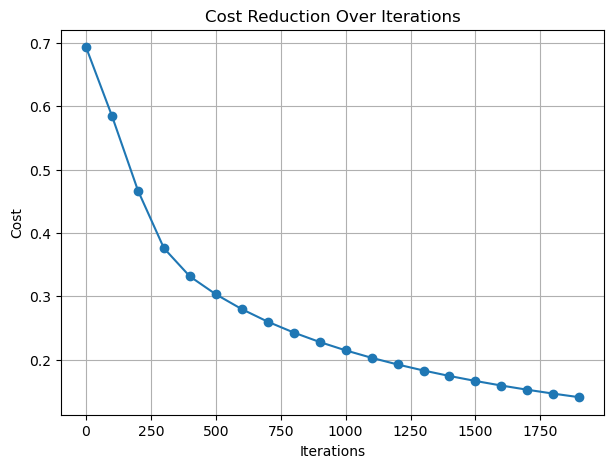

Misclassified Indices: [ 5  6 10 11 13 18 19 28 29 30 33 34 41 44 46]


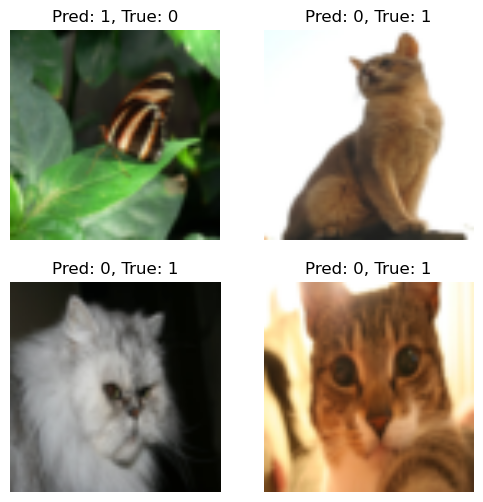

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
def prep_dt(train_file_path, test_file_path):
    with h5py.File(train_file_path, "r") as train_dataset:
        train_set_x = np.array(train_dataset["train_set_x"][:])  # Training data
        train_set_y = np.array(train_dataset["train_set_y"][:])  # Training labels
        classes = np.array(train_dataset["list_classes"][:])  # Class names

    with h5py.File(test_file_path, "r") as test_dataset:
        test_set_x = np.array(test_dataset["test_set_x"][:])  # Test data
        test_set_y = np.array(test_dataset["test_set_y"][:])  # Test labels

    return train_set_x, train_set_y, test_set_x, test_set_y, classes

# Flatten and normalize datasets
def flt_norm_dt(train_x, train_y, test_x, test_y):
    train_x_flat = train_x.reshape(train_x.shape[0], -1).T / 255.0  # (12288, m_train)
    test_x_flat = test_x.reshape(test_x.shape[0], -1).T / 255.0     # (12288, m_test)

    train_y = train_y.reshape(1, -1)  # (1, m_train)
    test_y = test_y.reshape(1, -1)    # (1, m_test)

    return train_x_flat, train_y, test_x_flat, test_y

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression model
def logistic_reg(X, Y, iter, learn_rate, print_cost=True):
    num_exp = X.shape[1]  # Number of examples
    num_chr = X.shape[0]  # Number of features
    w = np.zeros((num_chr, 1))  # Initialize weights
    b = 0  # Initialize bias

    costs = []  # To store the cost after each iteration

    for i in range(iter):
        # Forward propagation
        Z = np.dot(w.T, X) + b
        A = sigmoid(Z)  # Apply the sigmoid function
        cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / num_exp

        # Backward propagation
        dZ = A - Y
        dw = np.dot(X, dZ.T) / num_exp
        db = np.sum(dZ) / num_exp

        # Gradient descent
        w -= learn_rate * dw
        b -= learn_rate * db

        # Store the cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Iteration {i}, Cost: {cost:.6f}")

    return w, b, costs

# Prediction function
def prediction(w, b, X):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    return (A > 0.5).astype(int)

# File paths
train_file_path = "/Users/aiden/PycharmProjects/pythonProject_AMS 595/train_catvnoncat.h5"
test_file_path = "/Users/aiden/PycharmProjects/pythonProject_AMS 595/test_catvnoncat.h5"

# Load datasets
train_x_orig, train_y, test_x_orig, test_y, classes = prep_dt(train_file_path, test_file_path)

# Print data shape
print(f"Training set shape: {train_x_orig.shape}, {train_y.shape}")
print(f"Test set shape: {test_x_orig.shape}, {test_y.shape}")
print(f"Classes: {classes}")

# Preprocess the data (retain original data for visualization)
train_x, train_y, test_x, test_y = flt_norm_dt(train_x_orig, train_y, test_x_orig, test_y)

# Print preprocessed data shape
print(f"Processed Training set shape: {train_x.shape}, {train_y.shape}")
print(f"Processed Test set shape: {test_x.shape}, {test_y.shape}")

# Train the logistic regression model
w, b, costs = logistic_reg(train_x, train_y, iter=2000, learn_rate=0.005)

# Evaluate the model
train_predictions = prediction(w, b, train_x)
test_predictions = prediction(w, b, test_x)

train_accuracy = np.mean(train_predictions == train_y) * 100
test_accuracy = np.mean(test_predictions == test_y) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot cost reduction over iterations
plt.figure(figsize=(7, 5))
plt.plot(range(0, len(costs) * 100, 100), costs, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.grid()
plt.show()

# Identify misclassified images
mis_images = np.where(test_predictions != test_y)[1]
print(f"Misclassified Indices: {mis_images}")

# Visualize misclassified images
plt.figure(figsize=(6, 6))
for i, idx in enumerate(mis_images[:4]):  # Display up to 4 images
    plt.subplot(2, 2, i+1)
    plt.imshow(test_x_orig[idx], interpolation='bilinear')  # Use original test data for visualization
    plt.title(f"Pred: {test_predictions[0, idx]}, True: {test_y[0, idx]}")
    plt.axis('off')
plt.show()


# **Results Interpretation**

## **Cost Reduction Over Iterations**
- The cost function, representing the logistic regression loss, decreases steadily as the number of iterations increases. 
- The initial cost value is **0.693**, which is the baseline for a random classifier (assuming equal probabilities for both classes).
- As the model learns through gradient descent, the cost function decreases significantly, eventually stabilizing around **0.140** at the 2000th iteration. 
  - This behavior demonstrates that the logistic regression model is effectively minimizing the classification error on the training data.

---

## **Training and Test Set Accuracy**
- **Training Accuracy:** **99.04%**
    - The high training accuracy indicates that the logistic regression model has effectively learned the patterns in the training data.
    - This suggests that the model parameters (weights and bias) were updated efficiently during the optimization process.
  
- **Test Accuracy:** **70.00%**
    - The test accuracy is lower than the training accuracy, which could indicate overfitting or a challenging test set with some misclassified instances.
    - The model performs decently on unseen data but may require further tuning or regularization to improve generalization.

---

## **Misclassified Images**
- **Misclassified Indices:** `[5, 6, 10, 11, 13, 18, 19, 28, 29, 30, 33, 34, 41, 44, 46]`
    - These indices represent the test set images that the model predicted incorrectly.
    - Among the 50 test examples, 15 were misclassified, accounting for the 30% test error.

- **Visualization of Misclassified Images:**
    - The displayed images include:
      - **Top-left:** A butterfly incorrectly predicted as a cat (Predicted: **1**, True: **0**).
      - **Top-right and Bottom-row:** Cats incorrectly predicted as non-cats (Predicted: **0**, True: **1**).

---

## **Conclusion**
### **Strengths**
- The logistic regression model achieved near-perfect accuracy on the training set, demonstrating effective optimization.
- The cost function's smooth decline shows the success of gradient descent in minimizing classification error.

